___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports



In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime


## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2016,1,1)

In [3]:
import yfinance as yf
BAC=yf.download('BAC',start,end)

ModuleNotFoundError: No module named 'frozendict'

In [5]:
C=yf.download('C',start,end)
GS=yf.download('GS',start,end)
JPM=yf.download('JPM',start,end)
MS=yf.download('MS',start,end)
WFC=yf.download('WFC',start,end)

NameError: name 'yf' is not defined

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [6]:
tickers=['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [7]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1, keys=tickers)

NameError: name 'BAC' is not defined

In [8]:
bank_stocks.head()

NameError: name 'bank_stocks' is not defined

** Set the column name levels (this is filled out for you):**

In [ ]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

ValueError: Length of names must match number of levels in MultiIndex.

** Check the head of the bank_stocks dataframe.**

In [ ]:
bank_stocks.head()

BAC                                                      C  \
Price           Close       High        Low       Open    Volume       Close   
Ticker            BAC        BAC        BAC        BAC       BAC           C   
Date                                                                           
2006-01-03  31.173676  31.239889  30.557883  31.067730  16296700  324.013062   
2006-01-04  30.842604  31.279618  30.756524  31.120702  17757900  318.030975   
2006-01-05  30.882326  31.008135  30.670441  30.842599  14970700  319.608856   
2006-01-06  30.835976  31.061104  30.690303  30.988268  12599800  319.608856   
2006-01-09  30.855854  31.100849  30.696941  30.935313  15619400  318.096863   

                                                         ...         MS  \
Price             High         Low        Open   Volume  ...      Close   
Ticker               C           C           C        C  ...         MS   
Date                                                     ...              
2006-01-03  324.604682  316.256214  322.106720  1537600  ...  32.190914   
2006-01-04  322.763979  317.833775  321.186318  1870960  ...  32.212994   
2006-01-05  320.660618  318.162654  318.425595  1143160  ...  32.301319   
2006-01-06  321.449459  316.847933  321.317978  1370210  ...  32.334446   
2006-01-09  320.397625  317.505242  319.477324  1680740  ...  32.676731   

                                                            WFC             \
Price            High        Low       Open   Volume      Close       High   
Ticker             MS         MS         MS       MS        WFC        WFC   
Date                                                                         
2006-01-03  32.290286  31.324172  31.561558  5377000  18.778112  18.822262   
2006-01-04  32.726414  32.212994  32.406218  7977800  18.560310  18.731020   
2006-01-05  32.345485  32.030808  32.323402  5778000  18.539705  18.575024   
2006-01-06  32.489023  32.047372  32.444859  6889800  18.648605  18.704527   
2006-01-09  32.731939  32.362054  32.367576  4144500  18.645655  18.733954   

                                            
Price             Low       Open    Volume  
Ticker            WFC        WFC       WFC  
Date                                        
2006-01-03  18.363110  18.601516  11016400  
2006-01-04  18.463182  18.719247  10870000  
2006-01-05  18.430803  18.542648  10158000  
2006-01-06  18.474952  18.589740   8403800  
2006-01-09  18.575017  18.645655   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [ ]:
bank_stocks.head()

BAC                                                      C  \
Price           Close       High        Low       Open    Volume       Close   
Ticker            BAC        BAC        BAC        BAC       BAC           C   
Date                                                                           
2006-01-03  31.173676  31.239889  30.557883  31.067730  16296700  324.013062   
2006-01-04  30.842604  31.279618  30.756524  31.120702  17757900  318.030975   
2006-01-05  30.882326  31.008135  30.670441  30.842599  14970700  319.608856   
2006-01-06  30.835976  31.061104  30.690303  30.988268  12599800  319.608856   
2006-01-09  30.855854  31.100849  30.696941  30.935313  15619400  318.096863   

                                                         ...         MS  \
Price             High         Low        Open   Volume  ...      Close   
Ticker               C           C           C        C  ...         MS   
Date                                                     ...              
2006-01-03  324.604682  316.256214  322.106720  1537600  ...  32.190914   
2006-01-04  322.763979  317.833775  321.186318  1870960  ...  32.212994   
2006-01-05  320.660618  318.162654  318.425595  1143160  ...  32.301319   
2006-01-06  321.449459  316.847933  321.317978  1370210  ...  32.334446   
2006-01-09  320.397625  317.505242  319.477324  1680740  ...  32.676731   

                                                            WFC             \
Price            High        Low       Open   Volume      Close       High   
Ticker             MS         MS         MS       MS        WFC        WFC   
Date                                                                         
2006-01-03  32.290286  31.324172  31.561558  5377000  18.778112  18.822262   
2006-01-04  32.726414  32.212994  32.406218  7977800  18.560310  18.731020   
2006-01-05  32.345485  32.030808  32.323402  5778000  18.539705  18.575024   
2006-01-06  32.489023  32.047372  32.444859  6889800  18.648605  18.704527   
2006-01-09  32.731939  32.362054  32.367576  4144500  18.645655  18.733954   

                                            
Price             Low       Open    Volume  
Ticker            WFC        WFC       WFC  
Date                                        
2006-01-03  18.363110  18.601516  11016400  
2006-01-04  18.463182  18.719247  10870000  
2006-01-05  18.430803  18.542648  10158000  
2006-01-06  18.474952  18.589740   8403800  
2006-01-09  18.575017  18.645655   5619600  

[5 rows x 30 columns]

In [ ]:
for tick in tickers:
 print(tick,bank_stocks[tick]['Close'].max())


BAC Ticker
BAC    37.699581
dtype: float64
C Ticker
C    386.292694
dtype: float64
GS Ticker
GS    186.076126
dtype: float64
JPM Ticker
JPM    53.933903
dtype: float64
MS Ticker
MS    50.462799
dtype: float64
WFC Ticker
WFC    44.268093
dtype: float64


In [ ]:
bank_stocks.xs(key='Close', axis=1, level='Price').max()

     Ticker
BAC  BAC        37.699581
C    C         386.292694
GS   GS        186.076126
JPM  JPM        53.933903
MS   MS         50.462799
WFC  WFC        44.268093
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [ ]:
returns=pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [ ]:
for tick in tickers:
    returns[tick +' Returns']=bank_stocks[tick]['Close'].pct_change()

In [ ]:
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.005771,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001026,0.005874
2006-01-09,0.000645,-0.004731,0.012030,0.016243,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [ ]:
#returns=returns.dropna()

In [ ]:
import seaborn as sns

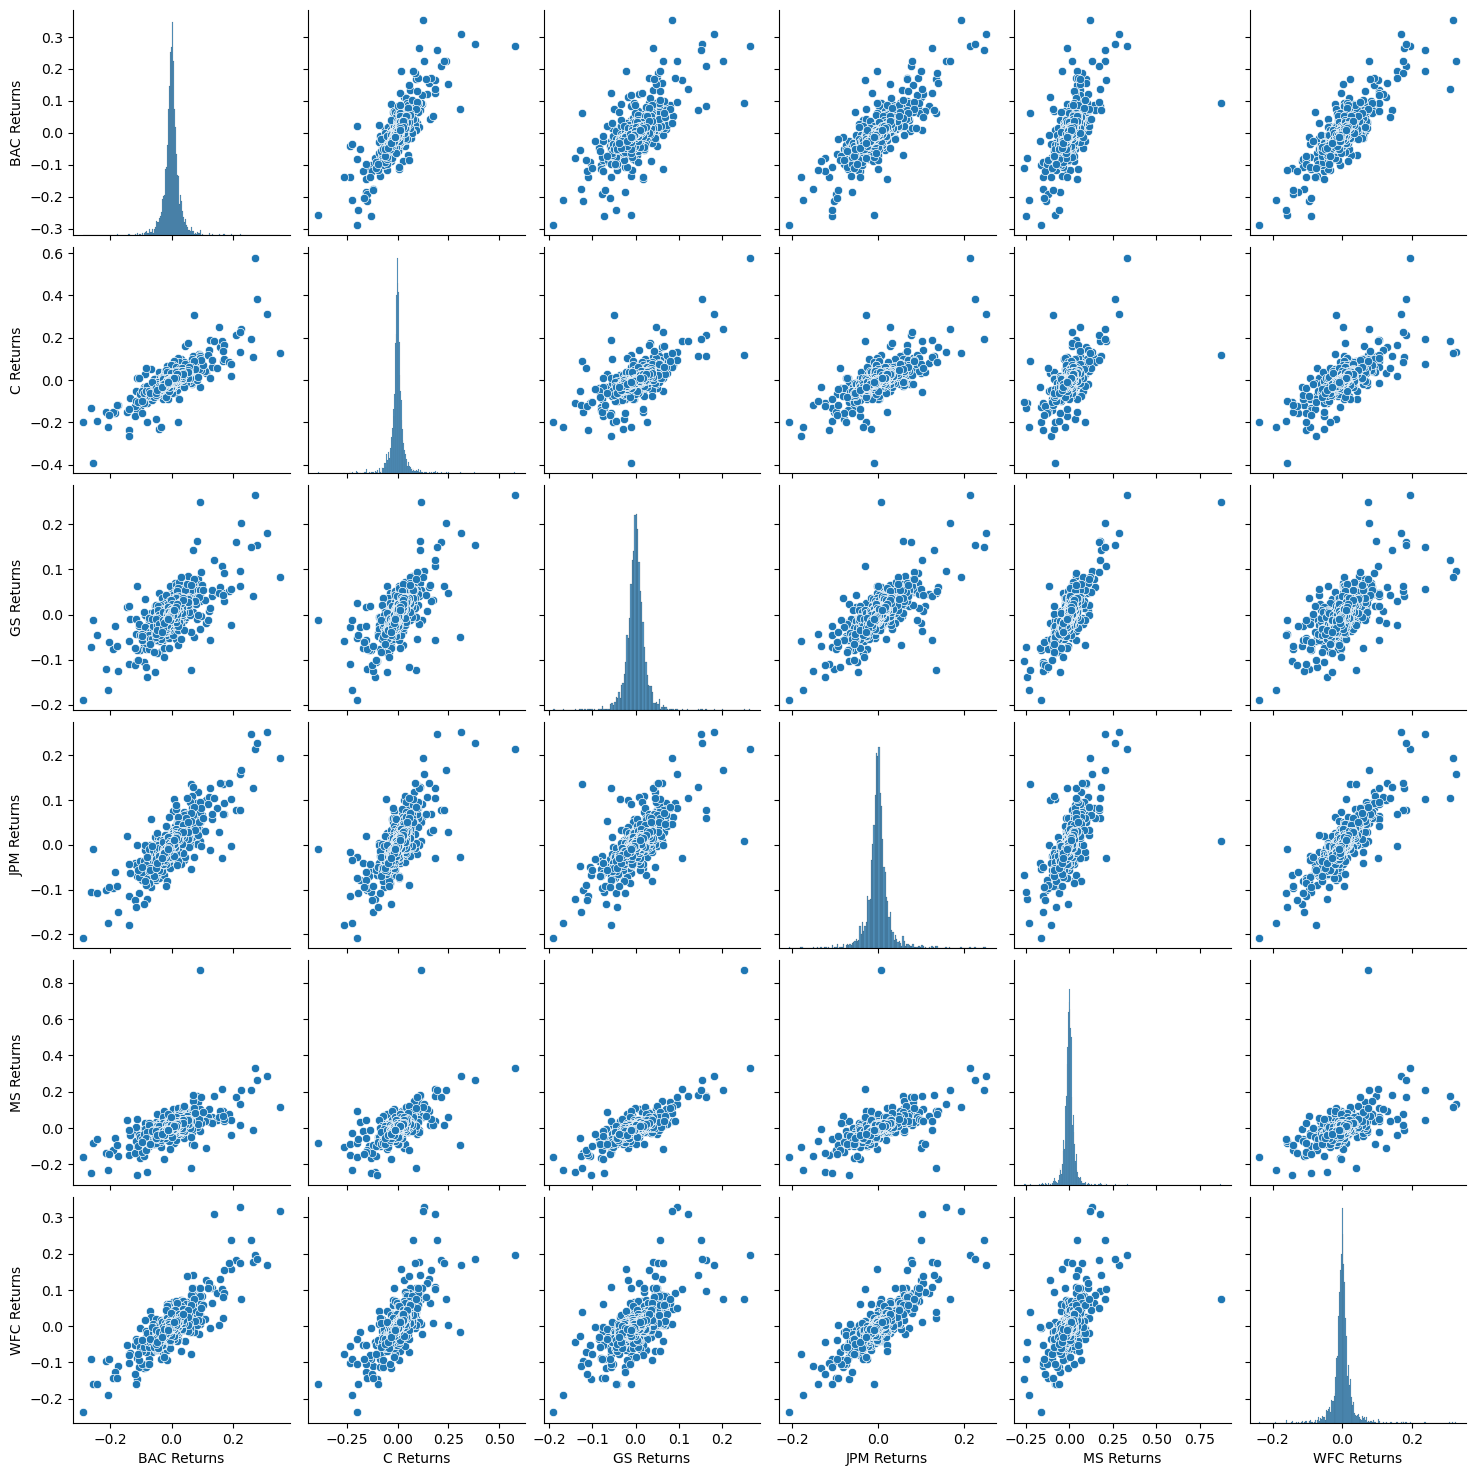

In [ ]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [ ]:
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [ ]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [ ]:
returns.std()

BAC Returns    0.036659
C Returns      0.038672
GS Returns     0.025386
JPM Returns    0.027675
MS Returns     0.037717
WFC Returns    0.030195
dtype: float64

In [ ]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Returns    0.016174
C Returns      0.015288
GS Returns     0.014043
JPM Returns    0.014006
MS Returns     0.016287
WFC Returns    0.012552
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

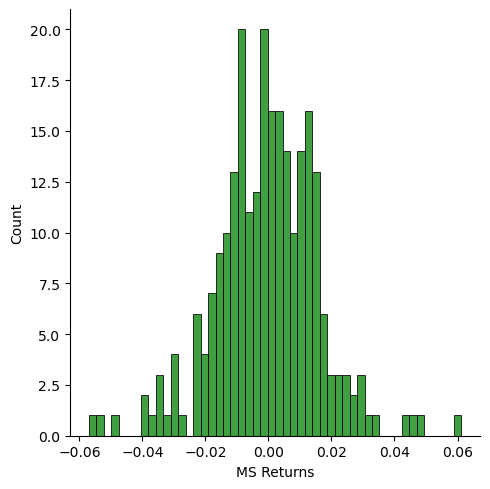

In [ ]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Returns'], color='green', bins=50)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\hp\AppData\Local\Temp\ipykernel_7552\1394153556.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='C Returns', ylabel='Density'>

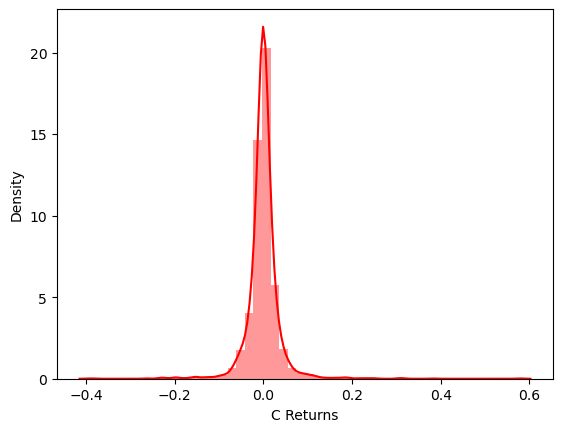

In [ ]:
sns.distplot(returns['C Returns'], color='red',bins= 50)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [ ]:
bank_stocks.head()

BAC                                                      C  \
Price           Close       High        Low       Open    Volume       Close   
Ticker            BAC        BAC        BAC        BAC       BAC           C   
Date                                                                           
2006-01-03  31.173676  31.239889  30.557883  31.067730  16296700  324.013062   
2006-01-04  30.842604  31.279618  30.756524  31.120702  17757900  318.030975   
2006-01-05  30.882326  31.008135  30.670441  30.842599  14970700  319.608856   
2006-01-06  30.835976  31.061104  30.690303  30.988268  12599800  319.608856   
2006-01-09  30.855854  31.100849  30.696941  30.935313  15619400  318.096863   

                                                         ...         MS  \
Price             High         Low        Open   Volume  ...      Close   
Ticker               C           C           C        C  ...         MS   
Date                                                     ...              
2006-01-03  324.604682  316.256214  322.106720  1537600  ...  32.190914   
2006-01-04  322.763979  317.833775  321.186318  1870960  ...  32.212994   
2006-01-05  320.660618  318.162654  318.425595  1143160  ...  32.301319   
2006-01-06  321.449459  316.847933  321.317978  1370210  ...  32.334446   
2006-01-09  320.397625  317.505242  319.477324  1680740  ...  32.676731   

                                                            WFC             \
Price            High        Low       Open   Volume      Close       High   
Ticker             MS         MS         MS       MS        WFC        WFC   
Date                                                                         
2006-01-03  32.290286  31.324172  31.561558  5377000  18.778112  18.822262   
2006-01-04  32.726414  32.212994  32.406218  7977800  18.560310  18.731020   
2006-01-05  32.345485  32.030808  32.323402  5778000  18.539705  18.575024   
2006-01-06  32.489023  32.047372  32.444859  6889800  18.648605  18.704527   
2006-01-09  32.731939  32.362054  32.367576  4144500  18.645655  18.733954   

                                            
Price             Low       Open    Volume  
Ticker            WFC        WFC       WFC  
Date                                        
2006-01-03  18.363110  18.601516  11016400  
2006-01-04  18.463182  18.719247  10870000  
2006-01-05  18.430803  18.542648  10158000  
2006-01-06  18.474952  18.589740   8403800  
2006-01-09  18.575017  18.645655   5619600  

[5 rows x 30 columns]

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.figure as fig

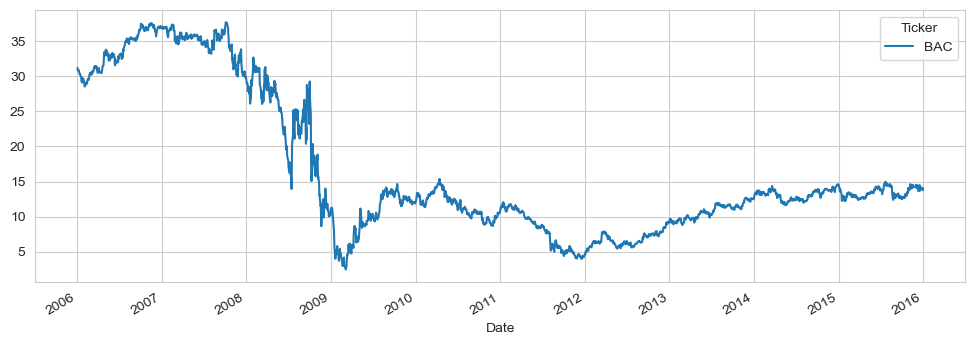

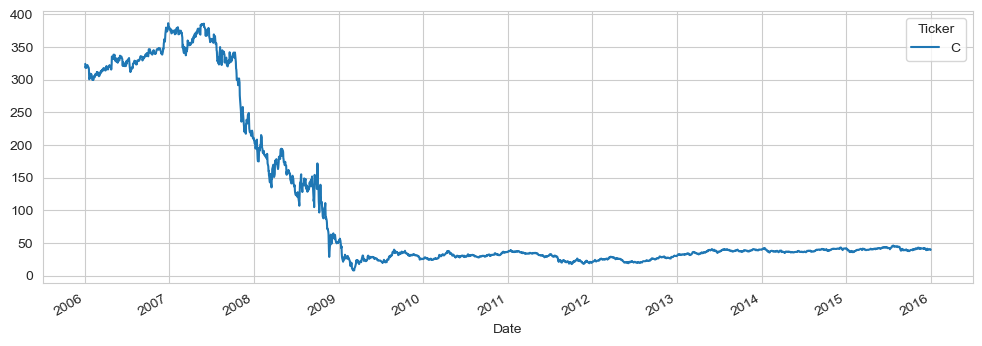

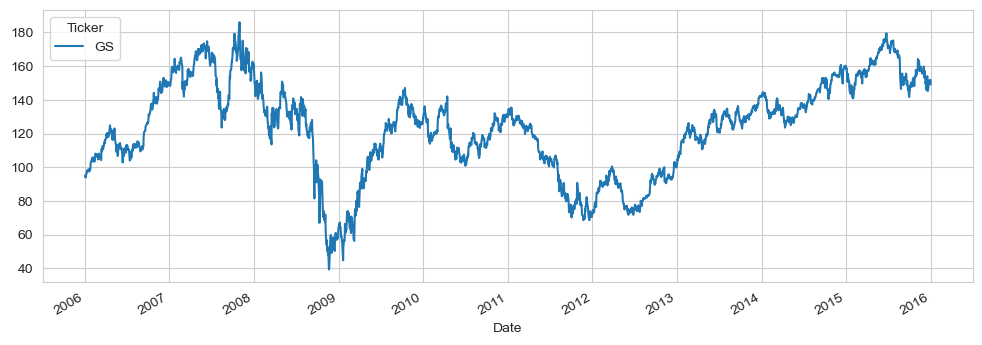

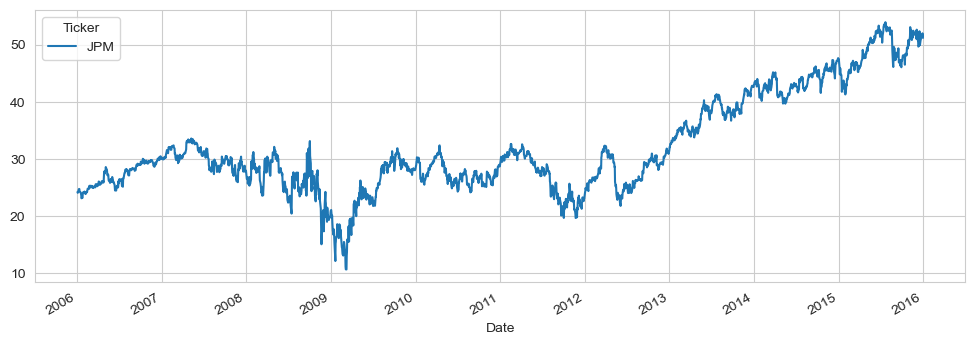

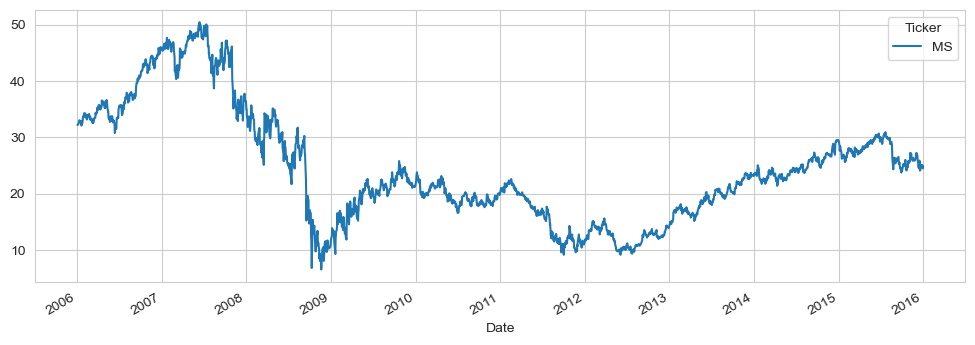

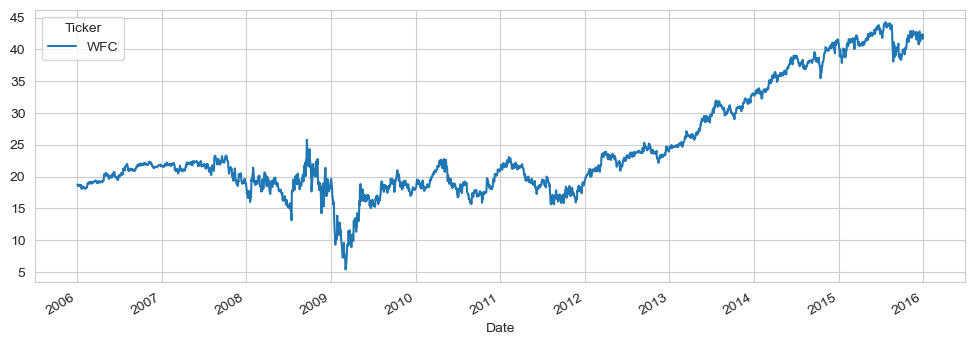

In [ ]:
for tick in tickers:
 data=bank_stocks[tick,'Close'].plot(figsize=(12,4))
plt.show()

In [ ]:
bank_stocks.head()

BAC                                                      C  \
Price           Close       High        Low       Open    Volume       Close   
Ticker            BAC        BAC        BAC        BAC       BAC           C   
Date                                                                           
2006-01-03  31.173676  31.239889  30.557883  31.067730  16296700  324.013062   
2006-01-04  30.842604  31.279618  30.756524  31.120702  17757900  318.030975   
2006-01-05  30.882326  31.008135  30.670441  30.842599  14970700  319.608856   
2006-01-06  30.835976  31.061104  30.690303  30.988268  12599800  319.608856   
2006-01-09  30.855854  31.100849  30.696941  30.935313  15619400  318.096863   

                                                         ...         MS  \
Price             High         Low        Open   Volume  ...      Close   
Ticker               C           C           C        C  ...         MS   
Date                                                     ...              
2006-01-03  324.604682  316.256214  322.106720  1537600  ...  32.190914   
2006-01-04  322.763979  317.833775  321.186318  1870960  ...  32.212994   
2006-01-05  320.660618  318.162654  318.425595  1143160  ...  32.301319   
2006-01-06  321.449459  316.847933  321.317978  1370210  ...  32.334446   
2006-01-09  320.397625  317.505242  319.477324  1680740  ...  32.676731   

                                                            WFC             \
Price            High        Low       Open   Volume      Close       High   
Ticker             MS         MS         MS       MS        WFC        WFC   
Date                                                                         
2006-01-03  32.290286  31.324172  31.561558  5377000  18.778112  18.822262   
2006-01-04  32.726414  32.212994  32.406218  7977800  18.560310  18.731020   
2006-01-05  32.345485  32.030808  32.323402  5778000  18.539705  18.575024   
2006-01-06  32.489023  32.047372  32.444859  6889800  18.648605  18.704527   
2006-01-09  32.731939  32.362054  32.367576  4144500  18.645655  18.733954   

                                            
Price             Low       Open    Volume  
Ticker            WFC        WFC       WFC  
Date                                        
2006-01-03  18.363110  18.601516  11016400  
2006-01-04  18.463182  18.719247  10870000  
2006-01-05  18.430803  18.542648  10158000  
2006-01-06  18.474952  18.589740   8403800  
2006-01-09  18.575017  18.645655   5619600  

[5 rows x 30 columns]

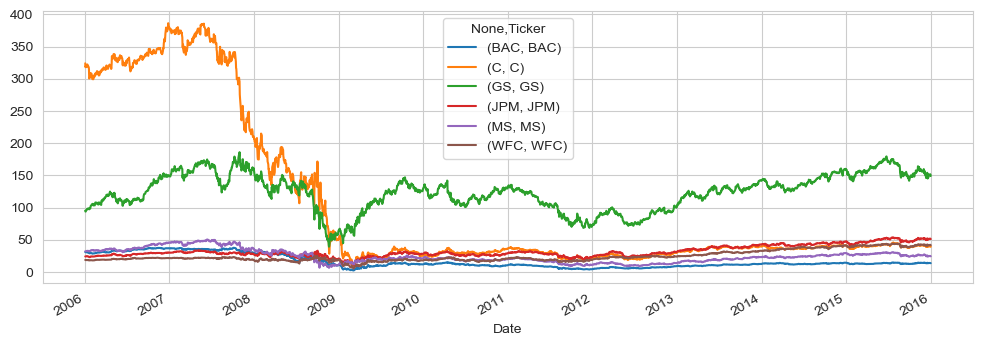

In [ ]:
bank_stocks.xs(key='Close', axis=1, level='Price').plot(kind='line',figsize=(12,4))
plt.show()

In [ ]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
bank_stocks.xs(key='Close', axis=1, level='Price').iplot(kind='line')
plt.show()

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\cufflinks\plotlytools.py:118: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [ ]:
BAC['Close'].loc['2008-01-01':'2009-01-01']

Ticker,BAC
Date,
2008-01-02,29.430883
2008-01-03,29.242197
2008-01-04,28.915684
2008-01-07,28.951963
2008-01-08,27.870790
...,...
2008-12-24,10.617903
2008-12-26,10.484491
2008-12-29,10.154892


In [ ]:
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean()

Ticker,BAC
Date,
2008-01-02,NaN
2008-01-03,NaN
2008-01-04,NaN
2008-01-07,NaN
2008-01-08,NaN
...,...
2008-12-24,11.447120
2008-12-26,11.361804
2008-12-29,11.262944


In [ ]:
%matplotlib inline

In [ ]:

BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot() 
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='Closing Price')


<Axes: xlabel='Date'>

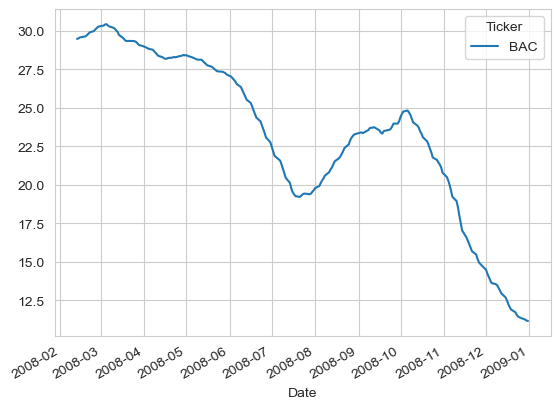

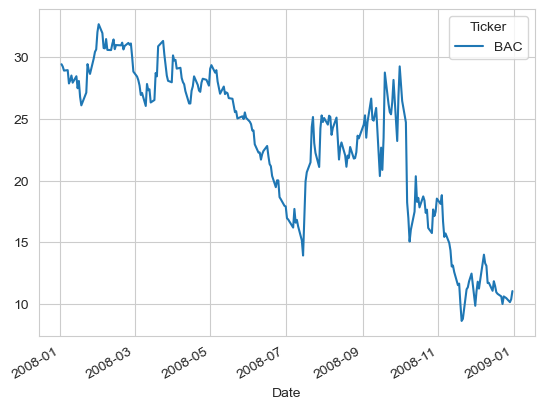

In [ ]:
plt.show()

** Create a heatmap of the correlation between the stocks Close Price.**

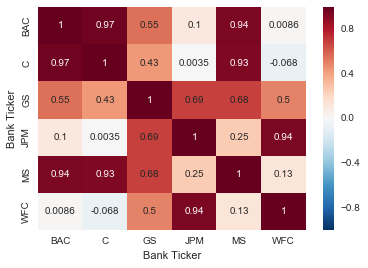

** Optional: Use seaborn's clustermap to cluster the correlations together:**

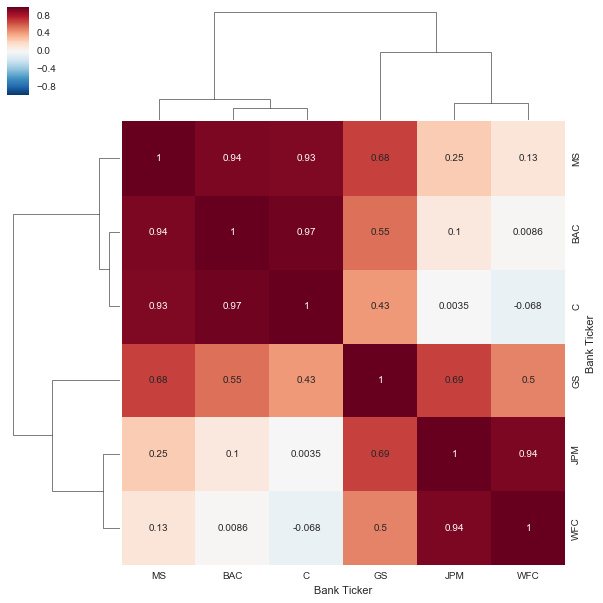

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.